<a href="https://colab.research.google.com/github/Vedant0402/EDA_reusable_code/blob/main/EDA(Day-7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 7 - Multivariate & Advanced Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [4]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [5]:
df.isnull().sum()

,0
year,0
month,0
passengers,0


In [6]:
df['month'].value_counts()

,count
month,
Jan,12
Feb,12
Mar,12
Apr,12
May,12
Jun,12
Jul,12
Aug,12
Sep,12


#### Observation --> Balanced and clean data

/tmp/ipython-input-2143208787.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index="month", columns="year", values="passengers")


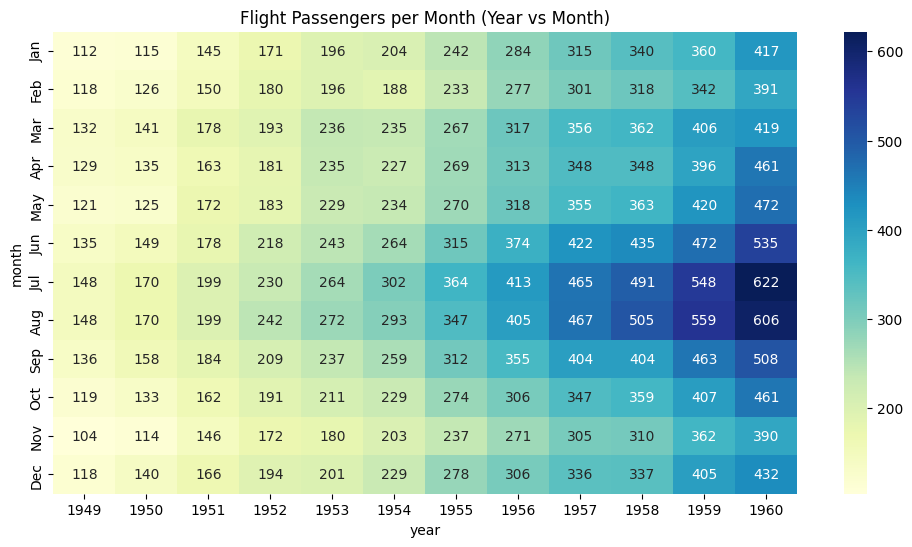

In [8]:
# Year vs Month vs Passengers

pivot_df = df.pivot_table(index="month", columns="year", values="passengers")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlGnBu") # Changed fmt to ".0f" for float
plt.title("Flight Passengers per Month (Year vs Month)")
plt.show()

#### Observation -->
##### Rise over the years in no. of passengers
##### Peaks in summer months

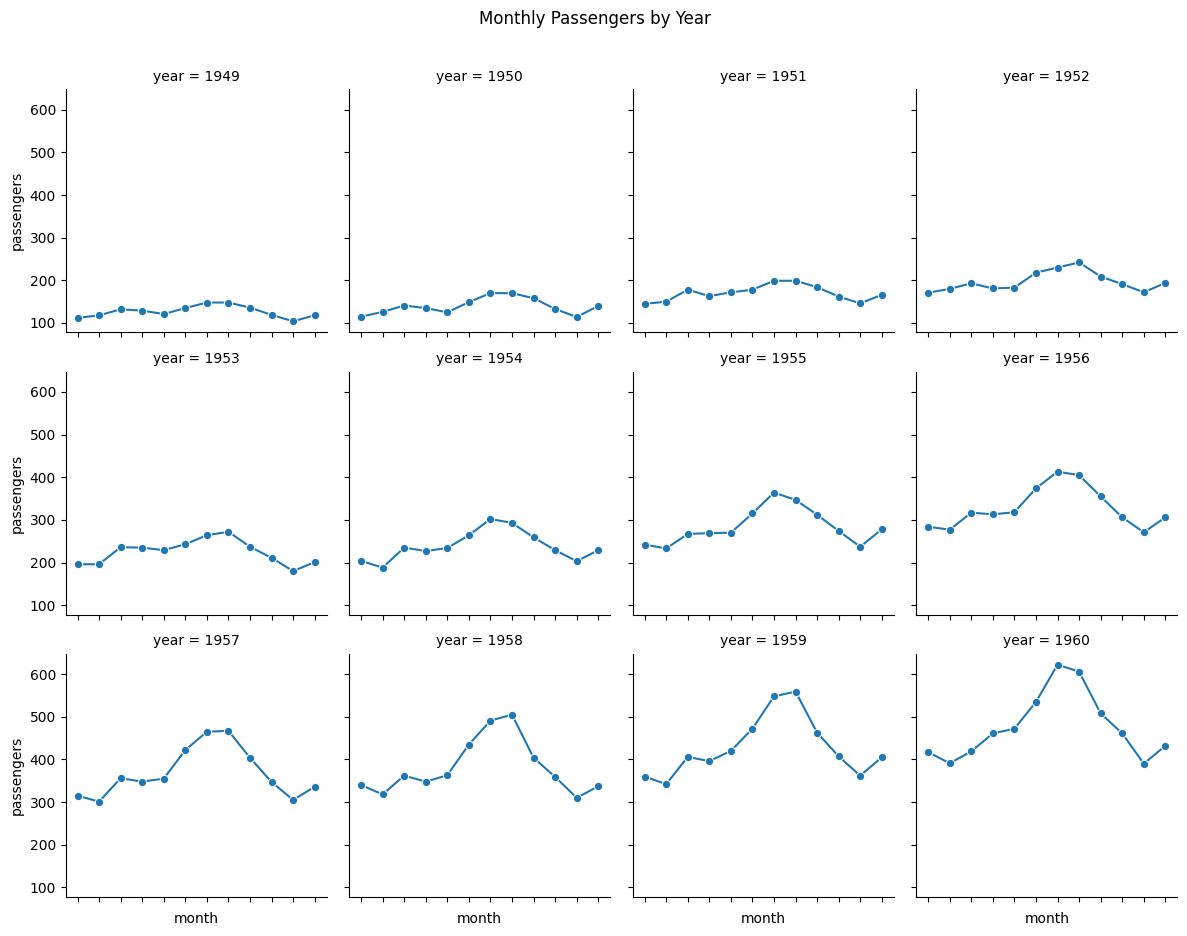

In [9]:
# month-wise patterns for each year

g = sns.FacetGrid(df, col="year", col_wrap=4, height=3)
g.map(sns.lineplot, "month", "passengers", marker="o")
g.set_xticklabels(rotation=45)
plt.suptitle("Monthly Passengers by Year", y=1.05)
plt.show()

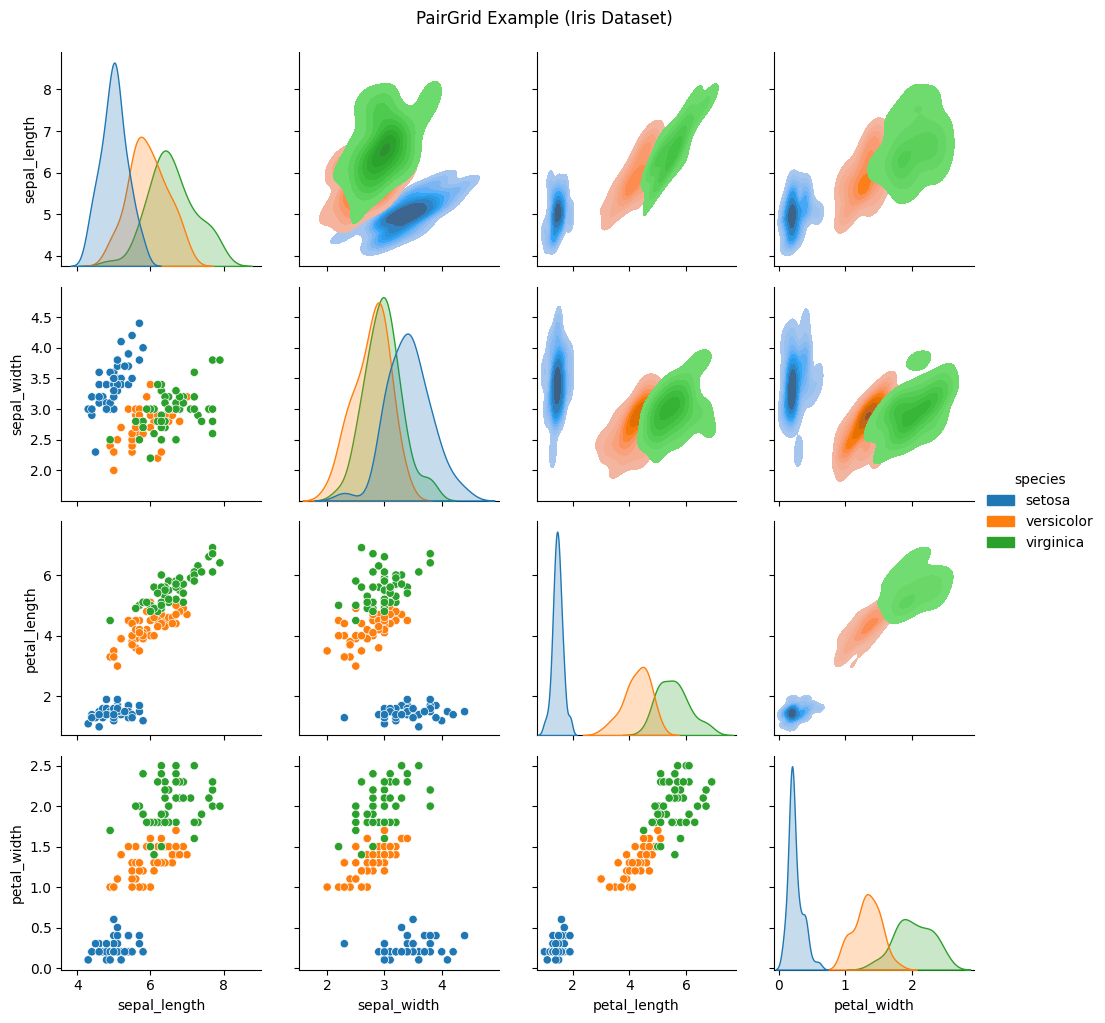

In [10]:
# Numeric Relationship across multiple variables

iris = sns.load_dataset("iris")

g = sns.PairGrid(iris, hue="species", diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot, fill=True)
g.map_diag(sns.kdeplot, fill=True)
g.add_legend()
plt.suptitle("PairGrid Example (Iris Dataset)", y=1.02)
plt.show()

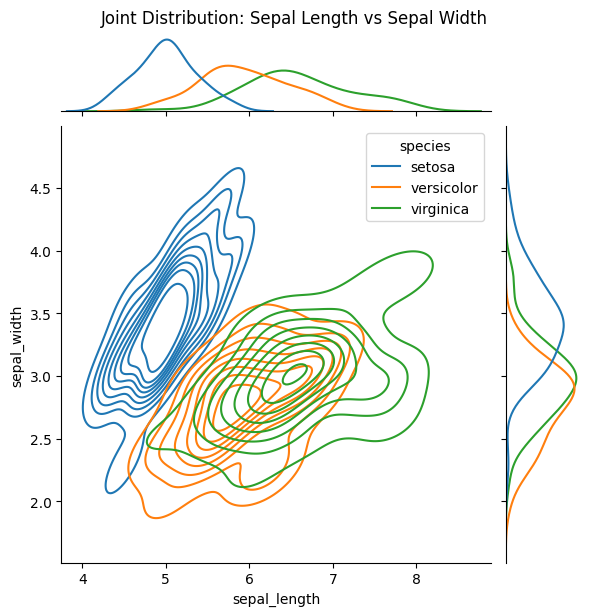

In [11]:
# Two Variables + Distribution

sns.jointplot(data=iris, x="sepal_length", y="sepal_width", hue="species", kind="kde")
plt.suptitle("Joint Distribution: Sepal Length vs Sepal Width", y=1.02)
plt.show()

In [12]:
fig = px.line(df, x="month", y="passengers", color="year",
              title="Interactive Flight Passenger Trend",
              markers=True)
fig.update_xaxes(categoryorder="array",
                 categoryarray=["January","February","March","April","May","June",
                                "July","August","September","October","November","December"])
fig.show()

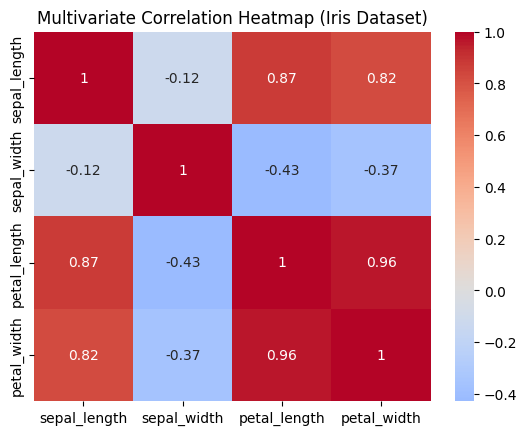

In [14]:
# Multivariate correlation (Numeric variables)
corr = iris.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Multivariate Correlation Heatmap (Iris Dataset)")
plt.show()